In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
# from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.initializers import Initializer
from collections import defaultdict
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Coastal Data System.csv')


In [3]:
df.replace(-99.90, np.nan, inplace=True)
df.drop('Date/Time', axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,0.763,1.15,4.520,5.513,49.0,25.65
1,0.770,1.41,4.582,5.647,75.0,25.50
2,0.747,1.16,4.515,5.083,91.0,25.45
3,0.718,1.61,4.614,6.181,68.0,25.45
4,0.707,1.34,4.568,4.705,73.0,25.50
5,0.729,1.21,4.786,4.484,63.0,25.50
6,0.733,1.20,4.897,5.042,68.0,25.50
7,0.711,1.29,5.019,8.439,66.0,25.50
8,0.698,1.11,4.867,4.584,64.0,25.55
9,0.686,1.14,4.755,5.211,56.0,25.55


In [4]:
df.isnull().sum()

Hs                0
Hmax              0
Tz                0
Tp                0
Peak Direction    0
SST               0
dtype: int64

In [5]:
for col in df.columns:
    for val in df[col]:
        if type(val)==np.nan:
            print(col)

In [7]:
X=np.array(df.drop(['Hs'],axis=1))

In [8]:
Y=np.array(df['Hs'])

In [9]:
type(X)

numpy.ndarray

In [10]:
np.isnan(Y).any()


False

In [11]:
X_trains, X_val, y_trains, y_val = train_test_split(X, Y, test_size=0.33, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_trains, y_trains, test_size=0.2, random_state=42)


In [12]:
from sklearn.preprocessing import StandardScaler

# # Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val=scaler.fit_transform(X_val)

In [13]:
print(X_val.shape)
print(y_val.shape)
print(X_train.shape)
print(y_train.shape)

(14340, 5)
(14340,)
(23291, 5)
(23291,)


In [14]:
# Implementing laplacian kernel
class LaplacianInitializer(Initializer):
    def __init__(self, alpha=0.5):
        self.alpha = alpha

    def __call__(self, shape, dtype=None):
        kernel = tf.random.normal(shape=shape, dtype=dtype)
        kernel = K.l2_normalize(kernel, axis=0)
        kernel = K.abs(kernel)
        kernel = K.pow(kernel, self.alpha)
        kernel = kernel - K.mean(kernel)
        kernel = kernel / K.std(kernel)
        return kernel

In [15]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from keras import backend as K
from keras.initializers import Initializer


class Anova_RBFKernel(Initializer):
    """
    Initializer that generates weights for the RBF kernel.
    """

    def __init__(self, gamma=1.0):
        self.gamma = gamma

    def __call__(self, shape, dtype=None):
        # Create an identity matrix of shape (num_inputs, num_inputs)
        identity_matrix = K.eye(shape[0], dtype=dtype)

        # Create the RBF kernel weights using the identity matrix
        rbf_weights = self.gamma * identity_matrix

        return rbf_weights


In [16]:
class PolynomialKernelInitializer(tf.keras.initializers.Initializer):
    """Initializer that implements a polynomial kernel for weight initialization."""

    def __init__(self, degree=2, scale=1.0):
        """Constructor for the PolynomialKernelInitializer class.

        Args:
            degree (int): Degree of the polynomial kernel.
            scale (float): Scaling factor for the kernel.
        """
        self.degree = degree
        self.scale = scale

    def __call__(self, shape, dtype=None):
        """Method to initialize weights using the polynomial kernel.

        Args:
            shape (tuple): Shape of the weight tensor to be initialized.
            dtype (tf.dtypes.DType, optional): Data type of the tensor. Defaults to None.

        Returns:
            tf.Tensor: Initialized weight tensor.
        """
        # Check if the shape is valid for weight initialization
        if len(shape) != 2:
            raise ValueError("Polynomial kernel can only be applied to 2D weight tensors.")

        # Get the number of input and output units in the weight tensor
        input_units, output_units = shape

        # Calculate the center of the weight tensor
        center = (input_units - 1) / 2

        # Calculate the polynomial kernel
        kernel = np.zeros(shape)
        for i in range(input_units):
            for j in range(output_units):
                distance = abs(i - center) ** self.degree + abs(j - center) ** self.degree
                kernel[i, j] = self.scale * distance

        return tf.convert_to_tensor(kernel, dtype=dtype)


In [17]:
# Since there is no predefined metric for a regression problem for co-efficient of determination . I have creatd my own acccuracy function for this regression problem
def accuracy(y_true,y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [18]:
# Fits and returns the model for anova rbf kernel

def solve_for_anova(X_train,y_train,X_val,y_val,hyperparameter):
    activation_function, optimizer, learning_rate,num_hidden_layers,kernel=hyperparameter
    model = Sequential()

    # Add an input layer
    model.add(InputLayer(input_shape=(5,)))

    model.add(Dense(5, activation=activation_function, use_bias=False, kernel_initializer=Anova_RBFKernel(gamma=1.0)))

    model.add(Dense(32, activation=activation_function))
    for i in range(num_hidden_layers-1):
        model.add(Dense(32, activation=activation_function,kernel_initializer=Anova_RBFKernel(gamma=1.0)))
    # Add an output layer
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer=optimizer(learning_rate), loss='mse', metrics=['mse',accuracy])
    history=model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_val, y_val), verbose=1)
    

    return model,history

In [19]:
# Fits and returns the model for polynomial kernel

def solve_for_polynomial(X_train,y_train,X_val,y_val,hyperparameter):
    activation_function, optimizer, learning_rate,num_hidden_layers,kernel=hyperparameter
    model = Sequential()

    # Add an input layer
    model.add(InputLayer(input_shape=(5,)))

    
    model.add(Dense(5, activation=activation_function, use_bias=False, kernel_initializer=PolynomialKernelInitializer(degree=2, scale=0.01)))

    model.add(Dense(32, activation=activation_function))
    for i in range(num_hidden_layers-1):
        model.add(Dense(32, activation=activation_function,kernel_initializer=PolynomialKernelInitializer(degree=2, scale=0.01)))
    # Add an output layer
    model.add(Dense(1, activation='linear',kernel_initializer=PolynomialKernelInitializer(degree=2, scale=0.01)))

    # Compile the model
    model.compile(optimizer=optimizer(learning_rate), loss='mse', metrics=['mse',accuracy])
    history=model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_val, y_val), verbose=1)
    

    return model,history

In [20]:
# Fits and returns the model for laplacian kernel

def solve_for_laplacian(X_train,y_train,X_val,y_val,hyperparameter):
    activation_function, optimizer, learning_rate,num_hidden_layers,kernel=hyperparameter
    model = Sequential()

    # Add an input layer
    model.add(InputLayer(input_shape=(5,)))

    model.add(Dense(5, activation=activation_function, use_bias=False, kernel_initializer=LaplacianInitializer(alpha=0.5)))
    model.add(Dense(32, activation=activation_function))
    for i in range(num_hidden_layers-1):
        model.add(Dense(32, activation=activation_function,kernel_initializer=LaplacianInitializer(alpha=0.5)))
    # Add an output layer
    model.add(Dense(1, activation='linear',kernel_initializer=LaplacianInitializer(alpha=0.5)))

    # Compile the model
    model.compile(optimizer=optimizer(learning_rate), loss='mse', metrics=['mse',accuracy])
    history=model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_val, y_val), verbose=1)
    

    return model,history

In [ ]:

optimizers_list = [optimizers.Adam, optimizers.SGD, optimizers.RMSprop]

# Define the hyperparameters to tune
activation_functions = ['relu', 'tanh'] 
# dense_units = [32, 64, 128]
learning_rates = [0.01, 0.001, 0.0001]
# batch_sizes = [32, 64, 128]
hidden_layers = [1,2, 3,5,10]
# loss_functions = ['mse', 'mae']
kernels=['Laplacian','Anova','Polynomial']
# kernels = [LaplacianInitializer(alpha=0.5), AnovaRadialBasisInitializer(gamma=0.1, num_centers=100, seed=42), PolynomialKernelInitializer(degree=3, coef0=1.0)]
num_features=X_trains.shape[1]
# Define the input shape of the ANN
input_shape = (num_features,)

# Create a list of all possible hyperparameters
all_hyperparameters = [
    (activation_function, optimizer, learning_rate, num_hidden_layers,kernel)
    for activation_function in activation_functions
    # for num_dense_units in dense_units
    for optimizer in optimizers_list
    for learning_rate in learning_rates
    # for batch_size in batch_sizes
    # for output_activation_function in output_activation_functions
    for num_hidden_layers in hidden_layers
    # for loss_function in loss_functions
    for kernel in kernels
]

# Define a function to perform hyperparameter tuning
def ann_hyperparameter_tuning(X_train, y_train, X_val, y_val,X_test,y_test, hyperparameters):
    
    # Initializing dictionary of list type to save all the parameters of best fitted miodel for each kernel
    models = defaultdict(list)
    models['Anova'].append(-float("inf"))
    models['Laplacian'].append(-float("inf"))
    models['Polynomial'].append(-float("inf"))
    
    
    # This for loop will give us the different-different combinations of hyperparameters.
    for hyperparameter in hyperparameters:
        # hyperparameter is a tuple having values of hyperparameters.
        try:
            
            if hyperparameter[-1]=="Anova":
                print("Anova kernel")
                print()
                print("Current Parameters are :",hyperparameter)
                print()
                ann_model,history=solve_for_anova(X_train,y_train,X_val,y_val,hyperparameter)
                present_accuracy=r2_score(y_test,ann_model.predict(X_test))
                previous_accuracy=models["Anova"][0]
                print("Accuracy is :",present_accuracy)
                if previous_accuracy<present_accuracy:
                    models["Anova"]=[present_accuracy,ann_model, history.history]

            elif hyperparameter[-1]=="Laplacian":
                print("Laplacian kernel")
                print()
                print("Current Parameters are :",hyperparameter)
                print()

                ann_model,history=solve_for_laplacian(X_train,y_train,X_val,y_val,hyperparameter)
                present_accuracy=r2_score(y_test,ann_model.predict(X_test))
                previous_accuracy=models["Laplacian"][0]
                print("Accuracy is :",present_accuracy)
                if previous_accuracy<present_accuracy:
                    models["Laplacian"]=[present_accuracy,ann_model, history.history]




            elif hyperparameter[-1]=="Polynomial":

                print("Polynomial kernel")
                print()
                print("Current Parameters are :",hyperparameter)
                print()

                ann_model,history=solve_for_polynomial(X_train,y_train,X_val,y_val,hyperparameter)
                present_accuracy=r2_score(y_test,ann_model.predict(X_test))
                previous_accuracy=models["Polynomial"][0]
                print("Accuracy is :",present_accuracy)
                if previous_accuracy<present_accuracy:
                    models["Polynomial"]=[present_accuracy,ann_model, history.history]
            
                
        except:
            pass

            
        
        
      
    return models

# Perform hyperparameter tuning
best_models = ann_hyperparameter_tuning(X_train, y_train, X_val, y_val,X_test,y_test ,all_hyperparameters)



Laplacian kernel

Current Parameters are : ('relu', <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 0.01, 1, 'Laplacian')

Epoch 1/2
728/728 [==============================] - 3s 3ms/step - loss: 0.0787 - mse: 0.0787 - accuracy: 0.6688 - val_loss: 0.0327 - val_mse: 0.0327 - val_accuracy: 0.8709
Epoch 2/2
182/182 [==============================] - 0s 2ms/step
Accuracy is : 0.9282621942089335
Anova kernel

Current Parameters are : ('relu', <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 0.01, 1, 'Anova')

Epoch 1/2
728/728 [==============================] - 3s 3ms/step - loss: 0.0354 - mse: 0.0354 - accuracy: 0.8516 - val_loss: 0.0169 - val_mse: 0.0169 - val_accuracy: 0.9335
Epoch 2/2
182/182 [==============================] - 0s 2ms/step
Accuracy is : 0.9528391729036128
Polynomial kernel

Current Parameters are : ('relu', <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 0.01, 1, 'Polynomial')

Epoch 1/2
717/728 [============================>.] - ETA: 0s - loss: 0.0540 - mse: 0.0

In [27]:
best_models['Anova'][0]

0.9523578550201727

In [28]:
best_models['Anova'][1]

In [29]:
best_models['Anova'][2]

{'loss': [0.04698353260755539, 0.014431688003242016],
 'mse': [0.04698353260755539, 0.014431688003242016],
 'accuracy': [0.8199189305305481, 0.9424958825111389],
 'val_loss': [0.016053451225161552, 0.01343275886029005],
 'val_mse': [0.016053451225161552, 0.01343275886029005],
 'val_accuracy': [0.9372753500938416, 0.9477041363716125]}

In [ ]:
# ALL THE HIGHEST ACCURACY RATED MODELS EACH FOR SPECIFIC KERNEL WILL BE SAVED IN best_models dictionary of list type

# The first keys are "Anova","Laplacian","Polynomial" and the values are their respective lists.
# Each list is of  size =3 . Where first value is highest accuracy of that specific Kerne,second value is the highest accuracy rated model object.
# Third is a dictionary where the results of highest accuracy rated model is saved such as , loss,mse,accuracy,val_loss,val_mse,val_accuracy.

For Anova Kernel
182/182 [==============================] - 0s 2ms/step - loss: 0.0137 - mse: 0.0137 - accuracy: 0.9484
dict_keys(['loss', 'mse', 'accuracy', 'val_loss', 'val_mse', 'val_accuracy'])


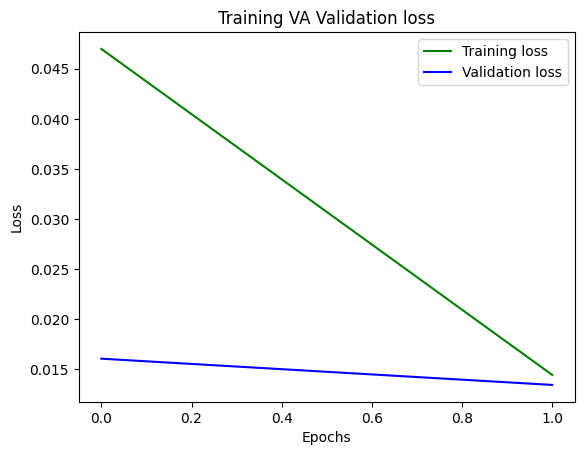

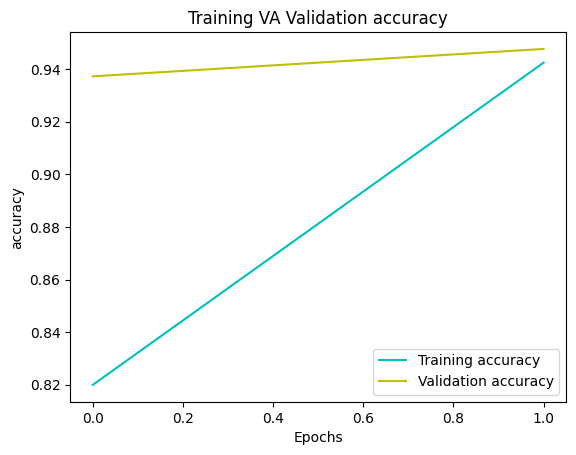

For Laplacian Kernel
182/182 [==============================] - 0s 2ms/step - loss: 0.0206 - mse: 0.0206 - accuracy: 0.9218
dict_keys(['loss', 'mse', 'accuracy', 'val_loss', 'val_mse', 'val_accuracy'])


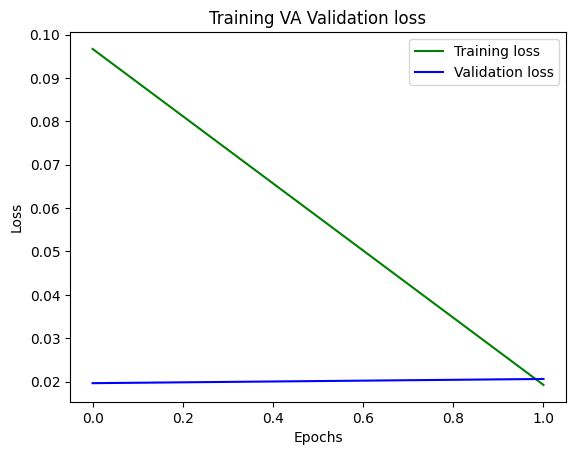

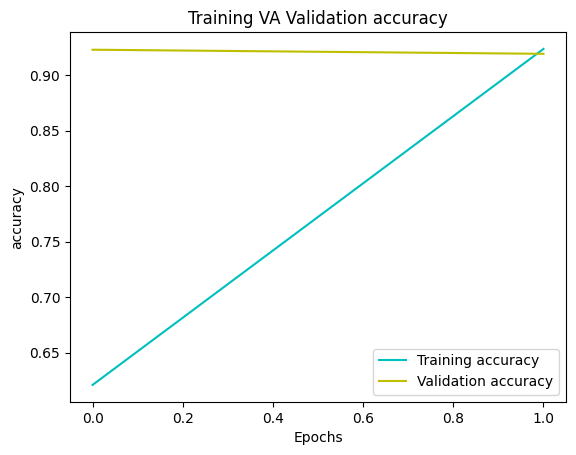

For Polynomial Kernel
182/182 [==============================] - 0s 2ms/step - loss: 0.0159 - mse: 0.0159 - accuracy: 0.9405
dict_keys(['loss', 'mse', 'accuracy', 'val_loss', 'val_mse', 'val_accuracy'])


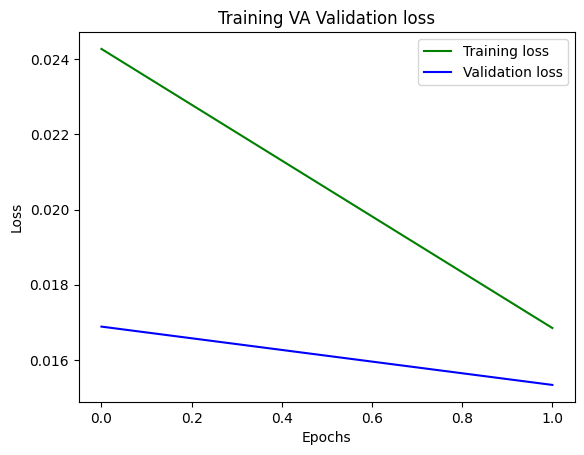

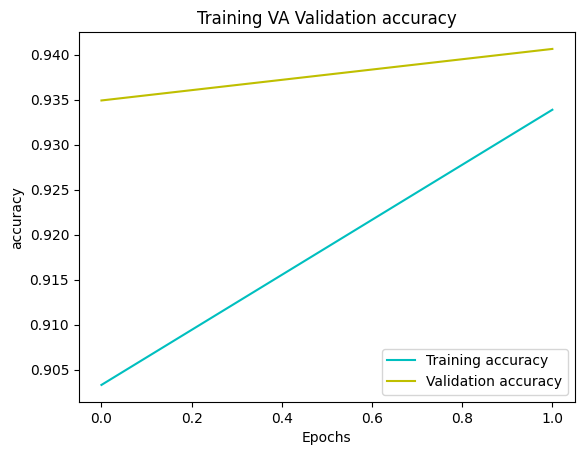

In [38]:
# Evaluate the best model on the test set 

# Note here number of epochs used should be same here as that of while training the respective models.

# Here all the highest accuracy rated
for kernel in best_models:
    
    # Checking Testing accuracy
    print(f'For {kernel} Kernel')
    
    model=best_models[kernel][1]
    # print(model.evaluate(X_test,y_test))
    loss,mse,accuracy=model.evaluate(X_test, y_test)
    here=best_models[kernel][-1]
    epochs = range(0,2)

    print(here.keys())
    loss_train = here['loss']
    loss_val = here['val_loss']
    plt.plot(epochs, loss_train, 'g', label='Training loss')
    plt.plot(epochs, loss_val, 'b', label='Validation loss')
    plt.title('Training VA Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    loss_train = here['accuracy']
    loss_val = here['val_accuracy']
    plt.plot(epochs, loss_train, 'c', label='Training accuracy')
    plt.plot(epochs, loss_val, 'y', label='Validation accuracy')
    plt.title('Training VA Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    
    plt.show()
    
    
    
   

In [ ]:
best_models